In [1]:
import sys
import os

sys.path.append(os.path.abspath(".."))

In [6]:
from torch.utils.data import DataLoader
from src import SCUTDataset
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from dataclasses import dataclass
import matplotlib.pyplot as plt

In [3]:
@dataclass(frozen=True)
class TrainingConfig:
    BATCH_SIZE:    int = 16
    EPOCHS:        int = 25
    LEARNING_RATE: float = 0.000005

@dataclass(frozen=True)
class DatasetConfig:
    DATA_ROOT:     str = 'data/scut_data'

@dataclass(frozen=True)
class ModelConfig:
    """
    Check this for complete pretrained Transformer Configuration.
    https://huggingface.co/docs/transformers/v4.29.1/en/main_classes/configuration#transformers.PretrainedConfig
    """
    MODEL_NAME: str = 'microsoft/trocr-large-handwritten'

In [4]:
processor = TrOCRProcessor.from_pretrained(ModelConfig.MODEL_NAME)

In [7]:
train_dataset = SCUTDataset(
    root_dir="D:/marchine_learning/Projet/Deep_learning Project/OCR project/SCUT-CTW/data/scut_data/scut_train/",     # adapte ton chemin
    ann_path="D:/marchine_learning/Projet/Deep_learning Project/OCR project/SCUT-CTW/data/scut_data/scut_train.txt",
    processor= processor,
    train_transforms =  None
)

valid_dataset = SCUTDataset(
    root_dir="D:/marchine_learning/Projet/Deep_learning Project/OCR project/SCUT-CTW/data/scut_data/scut_test/",     # adapte ton chemin
    ann_path="D:/marchine_learning/Projet/Deep_learning Project/OCR project/SCUT-CTW/data/scut_data/scut_test.txt",
    processor= processor,
    train_transforms = None
)

In [8]:
valid_dataset[0]['labels']

tensor([    0,  2553, 38603,    19,  3061,     2,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100])

In [9]:
print("Number of training examples:", len(train_dataset))
print("Number of validation examples:", len(valid_dataset))

Number of training examples: 6052
Number of validation examples: 1651


In [10]:
train_dataloader = DataLoader(
    train_dataset, batch_size=TrainingConfig.BATCH_SIZE, shuffle=True
)
valid_dataloader = DataLoader(
    valid_dataset, batch_size=TrainingConfig.BATCH_SIZE
)

In [ ]:
batch = next(iter(train_dataloader)) 
batch["pixel_values"].shape

torch.Size([16, 3, 384, 384])

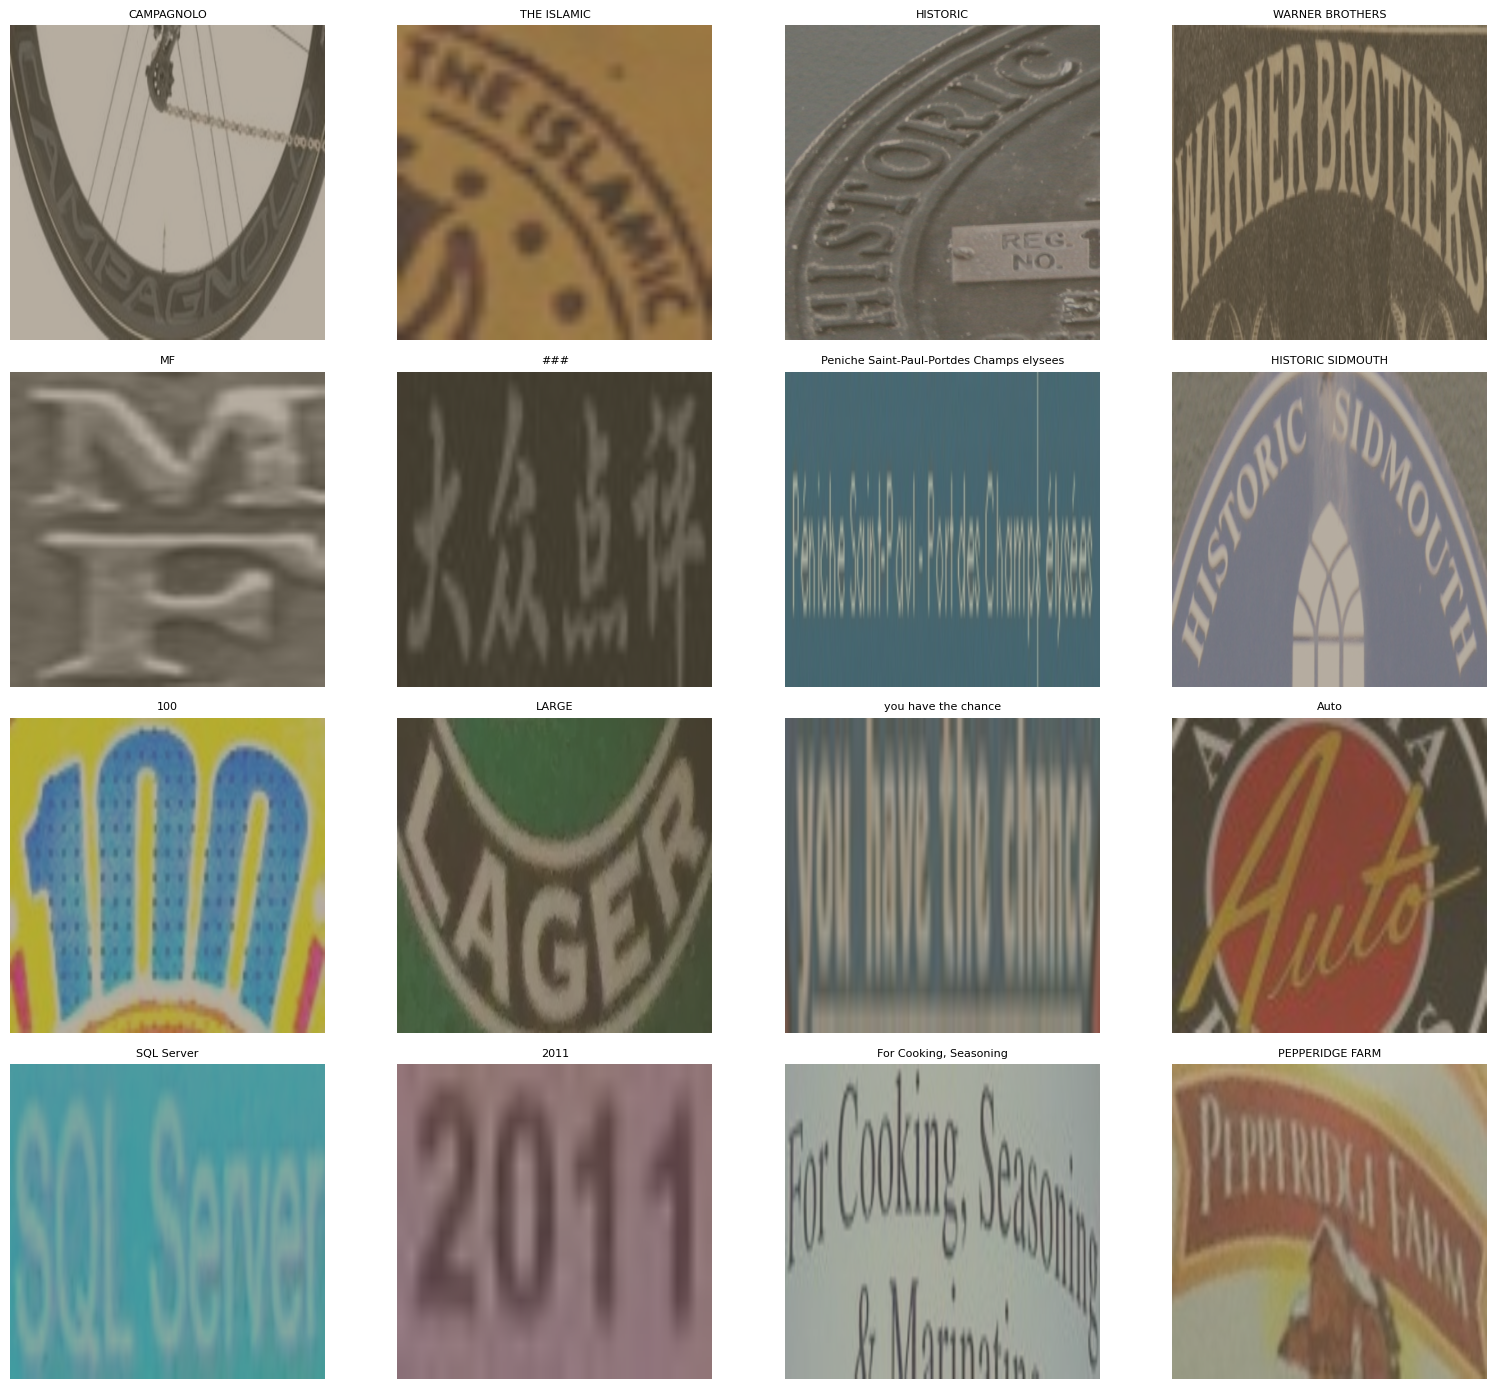

In [26]:
fig = plt.figure(figsize=(16, 14))
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

for i in range(16):
    # Images decode
    image = batch["pixel_values"][i].permute(1,2,0).numpy()
    image = image * std + mean
    image = image.clip(0, 1)

    # Label decode
    label_ids = batch["labels"][i]
    label_ids = label_ids[label_ids != -100]
    text = processor.tokenizer.decode(label_ids, skip_special_tokens=True)

    # Plot the label plus images
    plt.subplot(4,4,i+1)
    plt.title(text, fontsize=8)
    plt.imshow(image)
    plt.axis('off')


plt.tight_layout()
plt.show()